In [1]:
# Importamos las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Creamos columnas y cargamos el conjunto de datos de entrada
dataset = pd.read_csv('carga.csv', delimiter=',', names = ['Time','Irms_A','Prms_W'])
dataset

,Time,Irms_A,Prms_W
0,6/06/2023 23:45:03,-0.01,-1.32
1,6/06/2023 23:45:09,0.01,2.03
2,6/06/2023 23:45:14,0.02,4.01
3,6/06/2023 23:45:19,0.02,4.06
4,6/06/2023 23:45:24,0.01,2.74
...,...,...,...
104049,8/06/2023 22:25:45,0.08,17.27
104050,8/06/2023 22:25:46,0.04,9.93
104051,8/06/2023 22:25:48,0.04,10.30
104052,8/06/2023 22:25:50,0.03,7.15


<AxesSubplot:>

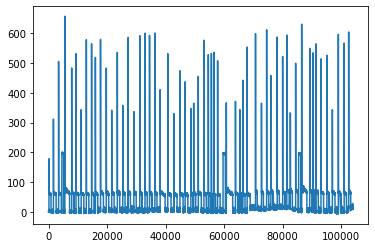

In [3]:
dataset['Prms_W'].plot()

In [4]:
# Convertir timestamp a datetime en pandas
dataset['Time'] = pd.to_datetime(dataset['Time'], format = '%d/%m/%Y %H:%M:%S')

In [5]:
# Vamos a reducir el dataset al dia 7/06/23
df_dia = dataset[(dataset['Time'].dt.day > 6) & (dataset['Time'].dt.day < 8)]
df_dia.reset_index(inplace=True, drop=True)
df_dia

,Time,Irms_A,Prms_W
0,2023-06-07 00:00:01,0.27,61.80
1,2023-06-07 00:00:06,0.26,60.42
2,2023-06-07 00:00:11,0.27,61.91
3,2023-06-07 00:00:16,0.27,62.44
4,2023-06-07 00:00:21,0.27,62.76
...,...,...,...
53672,2023-06-07 23:59:52,0.27,61.14
53673,2023-06-07 23:59:54,0.26,59.43
53674,2023-06-07 23:59:56,0.24,55.38
53675,2023-06-07 23:59:57,0.24,54.39


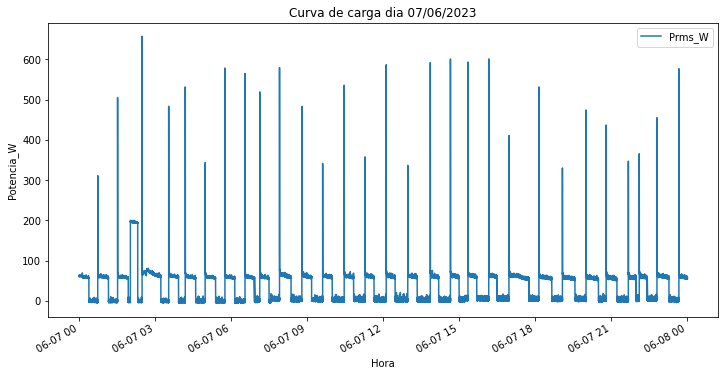

In [6]:
# Plotting

df_dia.plot(x='Time', y='Prms_W', kind='line', figsize=(12, 6))
plt.xlabel('Hora')
plt.ylabel('Potencia_W')
plt.title('Curva de carga dia 07/06/2023')
plt.show()

In [8]:
# Cálculo de la energia consumida en cada intérvalo
df_energia = df_dia.copy()
df_energia['Previous_Time'] = df_energia['Time'].shift(1)
df_energia['Delta_t'] = df_energia['Time'] - df_energia['Previous_Time']
df_energia['Delta_t'] = df_energia['Delta_t'].dt.total_seconds()
df_energia['Energia_Wh'] = df_energia['Prms_W'] * df_energia['Delta_t'] / 3600
df_energia['Energia_kWh'] = df_energia['Energia_Wh'] / 1000
df_energia

,Time,Irms_A,Prms_W,Previous_Time,Delta_t,Energia_Wh,Energia_kWh
0,2023-06-07 00:00:01,0.27,61.80,NaT,NaN,NaN,NaN
1,2023-06-07 00:00:06,0.26,60.42,2023-06-07 00:00:01,5.0,0.083917,0.000084
2,2023-06-07 00:00:11,0.27,61.91,2023-06-07 00:00:06,5.0,0.085986,0.000086
3,2023-06-07 00:00:16,0.27,62.44,2023-06-07 00:00:11,5.0,0.086722,0.000087
4,2023-06-07 00:00:21,0.27,62.76,2023-06-07 00:00:16,5.0,0.087167,0.000087
...,...,...,...,...,...,...,...
53672,2023-06-07 23:59:52,0.27,61.14,2023-06-07 23:59:51,1.0,0.016983,0.000017
53673,2023-06-07 23:59:54,0.26,59.43,2023-06-07 23:59:52,2.0,0.033017,0.000033
53674,2023-06-07 23:59:56,0.24,55.38,2023-06-07 23:59:54,2.0,0.030767,0.000031
53675,2023-06-07 23:59:57,0.24,54.39,2023-06-07 23:59:56,1.0,0.015108,0.000015


In [8]:
# Consumo diario
df_energia['Energia_Wh'].sum()

848.4373277777777

In [9]:
# Consumo anual
consumo_anual = df_energia['Energia_kWh'].sum() * 365
print("Consumo anual:", consumo_anual, "kWh")

# Precio medio 0,12 €/kWh
print("Coste anual:",  consumo_anual * 0.12, "€")

Consumo anual: 309.6796246388889 kWh
Coste anual: 37.16155495666667 €


In [10]:
precio = pd.read_csv('precio.csv', delimiter=';')

In [11]:
precio

,datetime,value,percentage
0,2023-06-07 00:00:00+02:00,114.85,0.580490
1,2023-06-07 01:00:00+02:00,108.14,0.586633
2,2023-06-07 02:00:00+02:00,107.11,0.591441
3,2023-06-07 03:00:00+02:00,103.15,0.602512
4,2023-06-07 04:00:00+02:00,100.74,0.605263
...,...,...,...
67,2023-06-09 19:00:00+02:00,197.20,0.680469
68,2023-06-09 20:00:00+02:00,210.47,0.668371
69,2023-06-09 21:00:00+02:00,209.39,0.667889
70,2023-06-09 22:00:00+02:00,162.45,0.613088


In [12]:
precio['datetime'] = pd.to_datetime(precio['datetime'])
precio['hora'] = precio['datetime'].dt.hour
precio['fecha'] = precio['datetime'].dt.date
precio

,datetime,value,percentage,hora,fecha
0,2023-06-07 00:00:00+02:00,114.85,0.580490,0,2023-06-07
1,2023-06-07 01:00:00+02:00,108.14,0.586633,1,2023-06-07
2,2023-06-07 02:00:00+02:00,107.11,0.591441,2,2023-06-07
3,2023-06-07 03:00:00+02:00,103.15,0.602512,3,2023-06-07
4,2023-06-07 04:00:00+02:00,100.74,0.605263,4,2023-06-07
...,...,...,...,...,...
67,2023-06-09 19:00:00+02:00,197.20,0.680469,19,2023-06-09
68,2023-06-09 20:00:00+02:00,210.47,0.668371,20,2023-06-09
69,2023-06-09 21:00:00+02:00,209.39,0.667889,21,2023-06-09
70,2023-06-09 22:00:00+02:00,162.45,0.613088,22,2023-06-09


In [13]:
df_energia['hora'] = df_energia['Time'].dt.hour
df_energia['fecha'] = df_energia['Time'].dt.date
df_energia

,Time,Irms_A,Prms_W,Previous_Time,Delta_t,Energia_Wh,Energia_kWh,hora,fecha
0,2023-06-07 00:00:01,0.27,61.80,NaT,NaN,NaN,NaN,0,2023-06-07
1,2023-06-07 00:00:06,0.26,60.42,2023-06-07 00:00:01,5.0,0.083917,0.000084,0,2023-06-07
2,2023-06-07 00:00:11,0.27,61.91,2023-06-07 00:00:06,5.0,0.085986,0.000086,0,2023-06-07
3,2023-06-07 00:00:16,0.27,62.44,2023-06-07 00:00:11,5.0,0.086722,0.000087,0,2023-06-07
4,2023-06-07 00:00:21,0.27,62.76,2023-06-07 00:00:16,5.0,0.087167,0.000087,0,2023-06-07
...,...,...,...,...,...,...,...,...,...
53672,2023-06-07 23:59:52,0.27,61.14,2023-06-07 23:59:51,1.0,0.016983,0.000017,23,2023-06-07
53673,2023-06-07 23:59:54,0.26,59.43,2023-06-07 23:59:52,2.0,0.033017,0.000033,23,2023-06-07
53674,2023-06-07 23:59:56,0.24,55.38,2023-06-07 23:59:54,2.0,0.030767,0.000031,23,2023-06-07
53675,2023-06-07 23:59:57,0.24,54.39,2023-06-07 23:59:56,1.0,0.015108,0.000015,23,2023-06-07


In [16]:
df_total = pd.merge(df_energia, precio, on=['fecha', 'hora'], how='left')
df_total

,Time,Irms_A,Prms_W,Previous_Time,Delta_t,Energia_Wh,Energia_kWh,hora,fecha,datetime,value,percentage
0,2023-06-07 00:00:01,0.27,61.80,NaT,NaN,NaN,NaN,0,2023-06-07,2023-06-07 00:00:00+02:00,114.85,0.580490
1,2023-06-07 00:00:06,0.26,60.42,2023-06-07 00:00:01,5.0,0.083917,0.000084,0,2023-06-07,2023-06-07 00:00:00+02:00,114.85,0.580490
2,2023-06-07 00:00:11,0.27,61.91,2023-06-07 00:00:06,5.0,0.085986,0.000086,0,2023-06-07,2023-06-07 00:00:00+02:00,114.85,0.580490
3,2023-06-07 00:00:16,0.27,62.44,2023-06-07 00:00:11,5.0,0.086722,0.000087,0,2023-06-07,2023-06-07 00:00:00+02:00,114.85,0.580490
4,2023-06-07 00:00:21,0.27,62.76,2023-06-07 00:00:16,5.0,0.087167,0.000087,0,2023-06-07,2023-06-07 00:00:00+02:00,114.85,0.580490
...,...,...,...,...,...,...,...,...,...,...,...,...
53672,2023-06-07 23:59:52,0.27,61.14,2023-06-07 23:59:51,1.0,0.016983,0.000017,23,2023-06-07,2023-06-07 23:00:00+02:00,154.74,0.619853
53673,2023-06-07 23:59:54,0.26,59.43,2023-06-07 23:59:52,2.0,0.033017,0.000033,23,2023-06-07,2023-06-07 23:00:00+02:00,154.74,0.619853
53674,2023-06-07 23:59:56,0.24,55.38,2023-06-07 23:59:54,2.0,0.030767,0.000031,23,2023-06-07,2023-06-07 23:00:00+02:00,154.74,0.619853
53675,2023-06-07 23:59:57,0.24,54.39,2023-06-07 23:59:56,1.0,0.015108,0.000015,23,2023-06-07,2023-06-07 23:00:00+02:00,154.74,0.619853


In [17]:
df_total.drop(columns=['fecha', 'hora', 'datetime'], inplace=True)
df_total.rename(columns={'value': 'precio_€/MWh', 'percentage':'renovables_%'}, inplace=True)
df_total

,Time,Irms_A,Prms_W,Previous_Time,Delta_t,Energia_Wh,Energia_kWh,precio_€/MWh,renovables_%
0,2023-06-07 00:00:01,0.27,61.80,NaT,NaN,NaN,NaN,114.85,0.580490
1,2023-06-07 00:00:06,0.26,60.42,2023-06-07 00:00:01,5.0,0.083917,0.000084,114.85,0.580490
2,2023-06-07 00:00:11,0.27,61.91,2023-06-07 00:00:06,5.0,0.085986,0.000086,114.85,0.580490
3,2023-06-07 00:00:16,0.27,62.44,2023-06-07 00:00:11,5.0,0.086722,0.000087,114.85,0.580490
4,2023-06-07 00:00:21,0.27,62.76,2023-06-07 00:00:16,5.0,0.087167,0.000087,114.85,0.580490
...,...,...,...,...,...,...,...,...,...
53672,2023-06-07 23:59:52,0.27,61.14,2023-06-07 23:59:51,1.0,0.016983,0.000017,154.74,0.619853
53673,2023-06-07 23:59:54,0.26,59.43,2023-06-07 23:59:52,2.0,0.033017,0.000033,154.74,0.619853
53674,2023-06-07 23:59:56,0.24,55.38,2023-06-07 23:59:54,2.0,0.030767,0.000031,154.74,0.619853
53675,2023-06-07 23:59:57,0.24,54.39,2023-06-07 23:59:56,1.0,0.015108,0.000015,154.74,0.619853


In [19]:
df_total['precio_interval'] = df_total['Energia_kWh'] * df_total['precio_€/MWh'] / 1000
df_total

,Time,Irms_A,Prms_W,Previous_Time,Delta_t,Energia_Wh,Energia_kWh,precio_€/MWh,renovables_%,precio_interval
0,2023-06-07 00:00:01,0.27,61.80,NaT,NaN,NaN,NaN,114.85,0.580490,NaN
1,2023-06-07 00:00:06,0.26,60.42,2023-06-07 00:00:01,5.0,0.083917,0.000084,114.85,0.580490,0.000010
2,2023-06-07 00:00:11,0.27,61.91,2023-06-07 00:00:06,5.0,0.085986,0.000086,114.85,0.580490,0.000010
3,2023-06-07 00:00:16,0.27,62.44,2023-06-07 00:00:11,5.0,0.086722,0.000087,114.85,0.580490,0.000010
4,2023-06-07 00:00:21,0.27,62.76,2023-06-07 00:00:16,5.0,0.087167,0.000087,114.85,0.580490,0.000010
...,...,...,...,...,...,...,...,...,...,...
53672,2023-06-07 23:59:52,0.27,61.14,2023-06-07 23:59:51,1.0,0.016983,0.000017,154.74,0.619853,0.000003
53673,2023-06-07 23:59:54,0.26,59.43,2023-06-07 23:59:52,2.0,0.033017,0.000033,154.74,0.619853,0.000005
53674,2023-06-07 23:59:56,0.24,55.38,2023-06-07 23:59:54,2.0,0.030767,0.000031,154.74,0.619853,0.000005
53675,2023-06-07 23:59:57,0.24,54.39,2023-06-07 23:59:56,1.0,0.015108,0.000015,154.74,0.619853,0.000002


In [20]:
df_total['precio_interval'].sum()

0.12519582329377776